In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generate Data

In [4]:
mean_01 = np.array([0., 2.])
sigma_01 = np.array([[1.0, 0.0], [0.0, 1.0]])

mean_02 = np.array([4., 0.])
sigma_02 = np.array([[1.0, 0.0], [0.0, 1.0]])


data1 = np.random.multivariate_normal(mean_01, sigma_01, 500)
data2 = np.random.multivariate_normal(mean_02, sigma_02, 500)
print (data1.shape, data2.shape)


(500, 2) (500, 2)


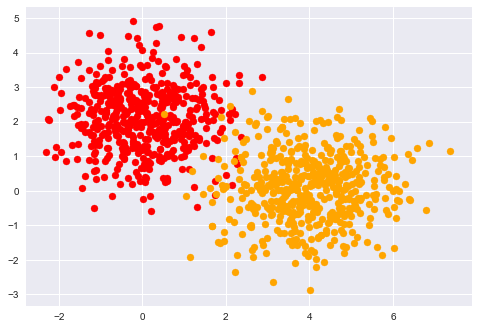

In [5]:
plt.style.use('seaborn')
plt.scatter(data1[:,0],data1[:,1],color = 'red')
plt.scatter(data2[:,0],data2[:,1],color = 'orange')
plt.show()

In [6]:
labels = np.zeros((1000,1))

In [7]:
labels[500:,:]=1

In [8]:
data = np.concatenate([data1,data2],axis=0)
print(data.shape)

(1000, 2)


In [9]:
ind = np.arange(1000)
np.random.shuffle(ind)

In [10]:
data = data[ind]
labels = labels[ind]

In [59]:
print(data.shape,labels.shape)

(1000, 2) (1000, 1)


In [17]:
def distance(x1,x2):
    return np.sqrt(((x1-x2)**2).sum())

def knn(querypoint,traindata,label,k =5):
    m = traindata.shape[0]
    
    dist = []
    for i in range(m):
        d = distance(querypoint,traindata[i])
        dist.append((d,label[i]))
    
    dist = sorted(dist)
    
    dist = dist[:k]
    
    dist  = np.array(dist)
    
    new_vals =np.unique(dist[:,1],return_counts=True)
    
    index = new_vals[1].argmax()
    
    pred = new_vals[0][index]
    return pred

In [20]:
x_test = np.asarray([6,2])
a = knn(x_test,data,labels)
print(a)

[1.]


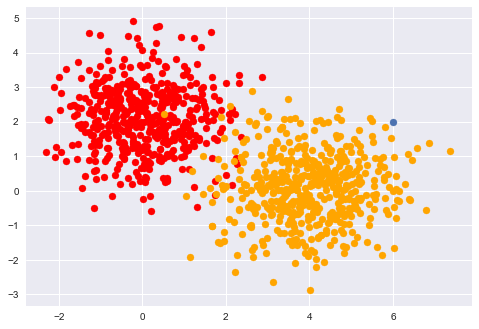

In [21]:
plt.style.use('seaborn')
plt.scatter(data1[:,0],data1[:,1],color = 'red')
plt.scatter(data2[:,0],data2[:,1],color = 'orange')
plt.scatter(x_test[0],x_test[1])
plt.show()
